In [1]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import skimage
import skimage.color
import skimage.io
import skimage.feature
import skimage.transform

In [3]:
skimage.__version__

'0.16.2'

In [4]:
# load the data
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [5]:
data['description']

'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'

In [6]:
# split the data into independent and dependent
X = data['data'] # independent
y = data['target'] # dependent

In [7]:
print(X)

[[[[196 214 188]
   [196 214 188]
   [196 215 187]
   ...
   [ 81  76  80]
   [ 81  76  80]
   [ 69  64  68]]

  [[196 214 188]
   [196 214 188]
   [196 215 187]
   ...
   [ 82  77  81]
   [ 83  78  82]
   [ 77  72  76]]

  [[193 213 185]
   [194 214 186]
   [194 214 186]
   ...
   [ 82  77  81]
   [ 82  76  80]
   [ 79  73  77]]

  ...

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 70  65  69]
   [ 65  60  66]
   [ 62  57  63]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 66  61  65]
   [ 62  57  63]
   [ 64  59  65]]

  [[254 254 254]
   [254 254 254]
   [254 254 254]
   ...
   [ 56  51  55]
   [ 79  74  80]
   [ 69  64  70]]]


 [[[  4   2   3]
   [  7   5   6]
   [  6   5   3]
   ...
   [ 42  31  25]
   [ 46  35  29]
   [ 43  32  26]]

  [[  7   5   6]
   [  5   3   4]
   [  2   1   0]
   ...
   [ 21  12   5]
   [ 43  32  26]
   [ 46  37  30]]

  [[  6   5   3]
   [  3   2   0]
   [  2   1   0]
   ...
   [ 32  25  17]
   [ 48  39  32]
   [ 53  46

In [8]:
print(y)

['bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'bear', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'c

In [9]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1645, 80, 80, 3), (412, 80, 80, 3), 1645, 412)

---
####  Feature Extraction
- Hog
[URL](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/#:~:text=HOG%2C%20or%20Histogram%20of%20Oriented,vision%20tasks%20for%20object%20detection.)

In [14]:
ls images


 Volume in drive D is DATA
 Volume Serial Number is FAA9-24C8

 Directory of D:\Image classifier\images

26-05-2021  09:36    <DIR>          .
26-05-2021  09:36    <DIR>          ..
21-02-2021  18:51            35,167 astro_gray.jpg
21-02-2021  16:01            40,344 astronaut.jpg
21-02-2021  16:02            41,686 coffee.jpg
21-02-2021  16:03             8,344 colorwheel.jpg
07-02-2021  14:15            51,426 dog_test.jpg
07-02-2021  14:08            98,479 eagle.jpg
21-02-2021  19:07             3,428 landscape.jpg
21-02-2021  19:17             8,844 landscape_hist_eq.jpg
02-02-2021  21:41           122,337 lion.bmp
21-02-2021  16:01            28,644 rocket.jpg
              10 File(s)        438,699 bytes
               2 Dir(s)  286,268,219,392 bytes free


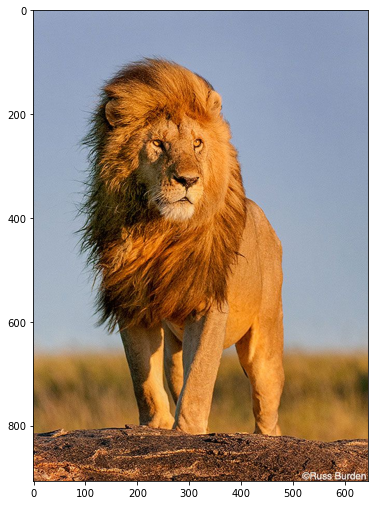

In [15]:
img = skimage.io.imread('./images/lion.bmp')
plt.figure(figsize=(6,10))
plt.imshow(img)

In [17]:
# hog transoform
img_re = skimage.transform.rescale(img,1/3).reshape((302,215))
gray = skimage.color.rgb2gray(img_re)
feature_vector, hog_img = skimage.feature.hog(gray,orientations=9,
                    pixels_per_cell=(14,14),
                    cells_per_block=(2,2),
                    visualize=True)

In [18]:
len(feature_vector)

10080

In [19]:
gray.shape

(302, 215)

In [20]:
302*215

64930

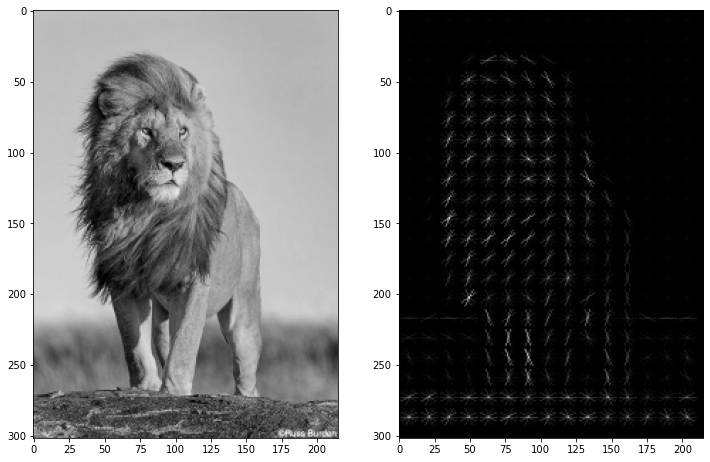

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap='gray')

---

## Preprocessing
- Grayscale
- Hog (histogram oriented gradient) tranformer

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

In [23]:
from skimage.color import rgb2gray

In [24]:
class rgb2gray_transform(BaseEstimator,TransformerMixin):
    import skimage.color
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return np.array([skimage.color.rgb2gray(x) for x in X])

In [25]:
x_train.shape

(1645, 80, 80, 3)

In [26]:
rgb2grayobj = rgb2gray_transform()
x_train_gray = rgb2grayobj.fit_transform(x_train)

In [27]:
x_train_gray.shape

(1645, 80, 80)

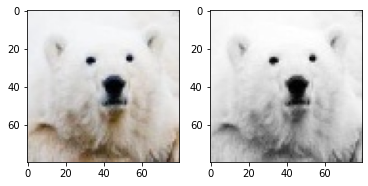

In [29]:
plt.subplot(1,2,1)
plt.imshow(x_train[22])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[22],cmap='gray')

In [30]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8, 8),cells_per_block=(3, 3),):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        def local_hog(img):
            hog_features= skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block)
            
            return hog_features
        
        hfeatures = np.array([local_hog(x) for x in X])
        return hfeatures

In [31]:
hogt = hogtransformer()

In [32]:
x_train_hog = hogt.fit_transform(x_train_gray)

In [33]:
x_train_hog.shape

(1645, 5184)

### Training Machine Learning Model

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [35]:
model_sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                          early_stopping=True,eta0=0.1,)

In [37]:
x_train.shape,x_test.shape

((1645, 80, 80, 3), (412, 80, 80, 3))

In [38]:
grayify = rgb2gray_transform()
hogify = hogtransformer()
scalify = StandardScaler()

In [39]:
# pipeline
# step-1: convert into grayscale
x_train_gray = grayify.fit_transform(x_train)
# step-2: extract the features
x_train_hog = hogify.fit_transform(x_train_gray)
# step-3: Normalization
x_train_scale = scalify.fit_transform(x_train_hog)
# step-4: machine learning
model_sgd.fit(x_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [40]:
x_test_gray = grayify.fit_transform(x_test)
# step-2: extract the features
x_test_hog = hogify.fit_transform(x_test_gray)
# step-3: Normalization
x_test_scale = scalify.transform(x_test_hog)

y_pred_test = model_sgd.predict(x_test_scale)

In [41]:
y_pred_test

array(['monkey', 'bear', 'elephant', 'panda', 'cat', 'cat', 'bear',
       'pigeon', 'tiger', 'pigeon', 'cat', 'duck', 'chicken', 'wolf',
       'lion', 'chicken', 'tiger', 'panda', 'sheep', 'wolf', 'lion',
       'tiger', 'sheep', 'chicken', 'elephant', 'tiger', 'cat', 'duck',
       'duck', 'tiger', 'bear', 'lion', 'cat', 'rabbit', 'human', 'duck',
       'panda', 'sheep', 'tiger', 'duck', 'lion', 'deer', 'pigeon',
       'monkey', 'dog', 'deer', 'cat', 'deer', 'cat', 'wolf', 'sheep',
       'deer', 'monkey', 'sheep', 'duck', 'bear', 'rabbit', 'mouse',
       'wolf', 'cat', 'pigeon', 'pigeon', 'eagle', 'chicken', 'mouse',
       'deer', 'mouse', 'eagle', 'mouse', 'sheep', 'cat', 'duck', 'deer',
       'elephant', 'chicken', 'eagle', 'dog', 'dog', 'panda', 'deer',
       'panda', 'panda', 'deer', 'duck', 'cat', 'sheep', 'eagle',
       'rabbit', 'lion', 'human', 'rabbit', 'bear', 'elephant', 'mouse',
       'dog', 'bear', 'monkey', 'rabbit', 'pigeon', 'eagle', 'elephant',
       'chic

### Model Evaluation

In [42]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
bear,0.687500,0.550000,0.611111,20.000000
cat,0.575758,0.593750,0.584615,32.000000
chicken,0.666667,0.700000,0.682927,20.000000
cow,0.470588,0.380952,0.421053,21.000000
deer,0.739130,0.809524,0.772727,21.000000
dog,0.500000,0.384615,0.434783,26.000000
duck,0.464286,0.619048,0.530612,21.000000
eagle,0.611111,0.550000,0.578947,20.000000
elephant,0.636364,0.700000,0.666667,20.000000
human,0.791667,0.950000,0.863636,20.000000


In [43]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5488639474404597

# Pipeline Model

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
model_pipeline = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer(orientations=8,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',eta0=0.001))
])

In [47]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('grascale', rgb2gray_transform()),
                ('hogtransform',
                 hogtransformer(orientations=8, pixels_per_cell=(10, 10))),
                ('scale', StandardScaler()),
                ('sgd', SGDClassifier(eta0=0.001, learning_rate='adaptive'))])

In [48]:
y_pred = model_pipeline.predict(x_test)

In [49]:
y_pred

array(['monkey', 'rabbit', 'pigeon', 'panda', 'cat', 'cat', 'mouse',
       'pigeon', 'tiger', 'rabbit', 'cat', 'duck', 'dog', 'lion', 'bear',
       'chicken', 'dog', 'rabbit', 'chicken', 'wolf', 'lion', 'cat',
       'sheep', 'chicken', 'pigeon', 'tiger', 'cat', 'wolf', 'cow',
       'lion', 'bear', 'bear', 'lion', 'rabbit', 'human', 'duck',
       'monkey', 'sheep', 'cow', 'duck', 'lion', 'human', 'pigeon',
       'monkey', 'elephant', 'deer', 'cat', 'deer', 'duck', 'wolf', 'dog',
       'cow', 'wolf', 'chicken', 'duck', 'tiger', 'rabbit', 'mouse',
       'wolf', 'tiger', 'rabbit', 'pigeon', 'eagle', 'chicken', 'mouse',
       'deer', 'mouse', 'sheep', 'lion', 'sheep', 'cat', 'duck', 'deer',
       'elephant', 'chicken', 'cat', 'monkey', 'lion', 'pigeon', 'deer',
       'panda', 'panda', 'deer', 'human', 'mouse', 'rabbit', 'wolf',
       'rabbit', 'lion', 'human', 'rabbit', 'sheep', 'elephant', 'lion',
       'bear', 'wolf', 'mouse', 'rabbit', 'pigeon', 'sheep', 'elephant',
       '

In [50]:
y_test_val = le.transform(y_test)

NameError: name 'le' is not defined

In [51]:
cr = sklearn.metrics.classification_report(y_test_val,y_pred,output_dict=True)
pd.DataFrame(cr).T

NameError: name 'y_test_val' is not defined

## Grid Search
- Hyperparameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [60]:
estimator = Pipeline([
    ('grascale',rgb2gray_transform()),
    ('hogtransform',hogtransformer()),
    ('scale',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [61]:
param_grid = [
    {
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['optimal'] 
    },
    {
    
        'hogtransform__orientations' : [7.8,9,10],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate': ['adaptive'],
        'sgd__eta0':[0.001,0.01]
    },
]

In [62]:
model_grid = GridSearchCV(estimator,
                          param_grid=param_grid,scoring='accuracy',
                          n_jobs=1,cv=2,verbose=2)

In [63]:
model_grid.fit(x_train,y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_tr

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   5.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   5.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   5.4s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__los

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hi

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Us

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge, total=   6.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   5.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   5.8s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__los

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=perceptron, total=   3.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Us

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2)

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(2, 2), 

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   8.6s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   7.2s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   7.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtrans

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   4.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   4.8s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   8.7s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=1

[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   9.0s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   8.3s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   8.5s
[CV] hogtransform__cells_per_block=(2, 2), hogtransform__

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Us

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), 

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7.8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=   0.1s
[CV] hogtransform__cells_per_block=(3, 3), 

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  15.3s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  13.6s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  13.8s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtrans

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=17.5min
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=   6.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge, total=  13.4s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=1

[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge, total=  10.7s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  10.8s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron 
[CV]  hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron, total=  10.9s
[CV] hogtransform__cells_per_block=(3, 3), hogtransform__

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 44.4min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('grascale', rgb2gray_transform()),
                                       ('hogtransform', hogtransformer()),
                                       ('scale', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9)],
                          'sgd__learning_rate': ['optimal'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7.8, 9, 10],
                          'hogtransform__pixels_per

In [64]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 10,
 'hogtransform__pixels_per_cell': (8, 8),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [65]:
model_grid.best_score_

0.7021275494969741

In [66]:
model_best = model_grid.best_estimator_

In [67]:
y_pred = model_best.predict(x_test)

In [78]:
cr = sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

C:\Users\Srikanth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.818182,0.900000,0.857143,20.000000
cat,0.857143,0.750000,0.800000,32.000000
chicken,0.782609,0.900000,0.837209,20.000000
cow,0.631579,0.571429,0.600000,21.000000
deer,0.760000,0.904762,0.826087,21.000000
dog,0.625000,0.769231,0.689655,26.000000
duck,0.705882,0.571429,0.631579,21.000000
eagle,0.521739,0.600000,0.558140,20.000000
elephant,0.875000,0.700000,0.777778,20.000000
human,0.950000,0.950000,0.950000,20.000000


In [68]:
# save the model
pickle.dump(model_best,open('dsa_model_best.pickle','wb'))

## Make Pipeline

    {'hogtransform__cells_per_block': (2, 2),
     'hogtransform__orientations': 10,
     'hogtransform__pixels_per_cell': (8, 8),
     'sgd__learning_rate': 'optimal',
     'sgd__loss': 'hinge'}

In [69]:
from sklearn.pipeline import make_pipeline

In [70]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                            hogtransformer(orientations=10,
                                           pixels_per_cell=(8,8),
                                           cells_per_block=(2,2)))

In [71]:
feature_vector = pipeline1.fit_transform(x_train)

In [72]:
# standard scaler
scalar = StandardScaler()
transformed_xtrain = scalar.fit_transform(feature_vector)

In [73]:
model = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.01,early_stopping=True)

In [74]:
model.fit(transformed_xtrain,y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

In [78]:
# evaluate
feature_vector = pipeline1.fit_transform(x_test)
transformed_x = scalar.transform(feature_vector)
y_pred_test = model.predict(transformed_x)

In [79]:
cr = pd.DataFrame(metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.705882,0.600000,0.648649,20.000000
cat,0.794118,0.843750,0.818182,32.000000
chicken,0.818182,0.900000,0.857143,20.000000
cow,0.809524,0.809524,0.809524,21.000000
deer,0.909091,0.952381,0.930233,21.000000
dog,0.472222,0.653846,0.548387,26.000000
duck,0.695652,0.761905,0.727273,21.000000
eagle,0.733333,0.550000,0.628571,20.000000
elephant,0.789474,0.750000,0.769231,20.000000
human,0.950000,0.950000,0.950000,20.000000


In [80]:
# save models for flask app
pickle.dump(model,open('dsa_image_classification_sgd.pickle','wb'))

In [81]:
pickle.dump(scalar,open('dsa_scaler.pickle','wb'))

# Output Analysis

In [166]:
model_p = pickle.load(open('dsa_model_best.pickle','rb'))

In [167]:
model_p.get_params()

{'memory': None,
 'steps': [('grascale', rgb2gray_transform()),
  ('hogtransform',
   hogtransformer(cells_per_block=(2, 2), orientations=8, pixels_per_cell=(10, 10))),
  ('scale', StandardScaler()),
  ('sgd', SGDClassifier(eta0=0.001))],
 'verbose': False,
 'grascale': rgb2gray_transform(),
 'hogtransform': hogtransformer(cells_per_block=(2, 2), orientations=8, pixels_per_cell=(10, 10)),
 'scale': StandardScaler(),
 'sgd': SGDClassifier(eta0=0.001),
 'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 8,
 'hogtransform__pixels_per_cell': (10, 10),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__class_weight': None,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.001,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge',
 'sgd__max_iter': 1000,
 'sgd__n_iter_no_change': 5,
 'sgd__n_jobs': None,
 'sgd__penalty':

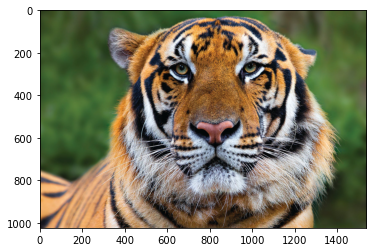

In [469]:
img_test= skimage.io.imread('tiger_test.jpg')
plt.imshow(img_test)

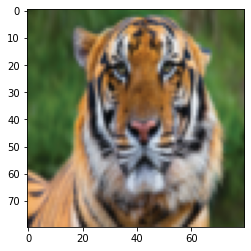

In [470]:
# image size is 80 x 80
img_resize = skimage.transform.resize(img_test,(80,80))
# rescale into 255
img_rescale = np.array(255*img_resize).astype(np.uint8)
plt.imshow(img_rescale)

In [471]:
# pass to pipeline model
img_reshape = img_rescale.reshape(-1,80,80,3)
print(img_reshape.shape)
result = model_pipeline.predict(img_reshape)
print(result)

(1, 80, 80, 3)
[5]


In [472]:
# Descision Function
distance = model_pipeline.decision_function(img_reshape)[0]
print(distance)

[ 5.75370712 12.24500513  5.76864729 12.20746737  2.7388824  19.30485679
  7.77682698  3.7492711   8.78288887 10.11721968 16.26141015 13.24395185
 17.28262812 -0.30971381  1.72096413  0.71980935 18.29393238 15.27077942
 13.23525647  5.75854397]


In [473]:
labels = list(data['labels'])
labels.sort()
print(labels)

['bear', 'cat', 'chicken', 'cow', 'deer', 'dog', 'duck', 'eagle', 'elephant', 'human', 'lion', 'monkey', 'mouse', 'natural', 'panda', 'pigeon', 'rabbit', 'sheep', 'tiger', 'wolf']


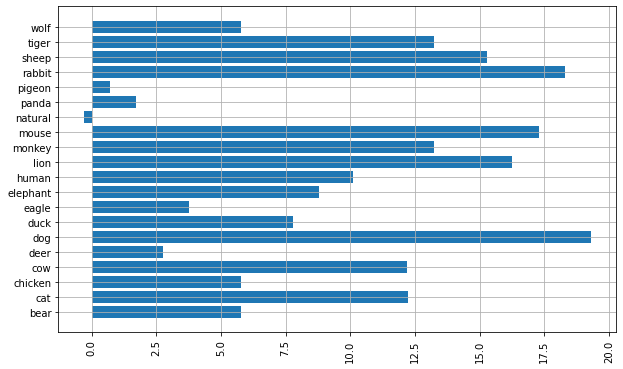

In [474]:
plt.figure(figsize=(10,6))
plt.barh(labels,distance)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [475]:
# confidence score
mean_distance = distance.mean()
std_distance = distance.std()
z = (distance - mean_distance)/std_distance
z

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])

In [476]:
mean_distance

9.496116738372246

In [477]:
std_distance

5.976331358171906

In [478]:
from scipy import stats

In [479]:
dist = stats.t

In [480]:
dist.cdf(2.21719813,19)

0.9804985267531022

In [481]:
dof = len(z) - 1
pvalues = [dist.cdf(zval,dof) for zval in z]
print(pvalues)

[0.2693157161111511, 0.6746184285442451, 0.2701187789365209, 0.6724013008095282, 0.13613339380733908, 0.94140393774905, 0.38835184849219784, 0.1741646039671521, 0.4531285822198086, 0.5408418151202851, 0.8641432492347143, 0.7309755940591313, 0.8959089406248415, 0.05864698735263532, 0.10440945435151623, 0.07916370072656952, 0.9213186651894776, 0.8269722933653654, 0.7305086321415764, 0.2695755643050099]


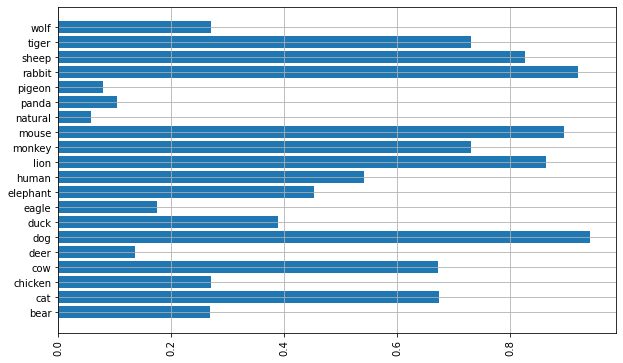

In [482]:
plt.figure(figsize=(10,6))
plt.barh(labels,pvalues)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [483]:
import scipy

In [484]:
aa = scipy.special.softmax(z)

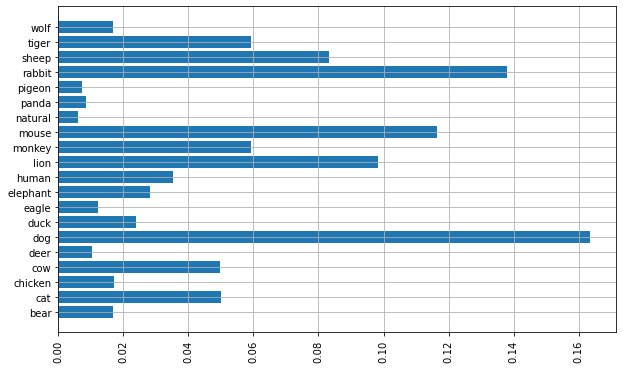

In [485]:
plt.figure(figsize=(10,6))
plt.barh(labels,aa)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [486]:
import scipy

In [487]:
scipy.stats.zscore(distance)

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])

In [488]:
z

array([-0.62620517,  0.45996251, -0.62370528,  0.45368144, -1.13066594,
        1.64126443, -0.28768314, -0.9616009 , -0.11934209,  0.10392713,
        1.13201444,  0.627113  ,  1.30289151, -1.64077759, -1.30099088,
       -1.46851084,  1.47210975,  0.96625544,  0.62565803, -0.62539584])